In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

import json

from sklearn.decomposition import PCA
import seaborn as sns


#https://www.youtube.com/watch?v=QmgJmh2I3Fw

In [2]:
def NormalizeData(data):
    return (data-data.min()) / (data.max()-data.min())
    #return data

def normalize(datas):
    return (datas-np.mean(datas))/np.std(datas)

def norm(data):
    trans = RobustScaler()
    return trans.fit_transform(data.reshape(-1, 1)).reshape(1,-1)

In [3]:
masks = glob("G:/instru_projects/TimeSeriesAnalysis/*/*/*/*/*.npy")
len(masks)

965

In [110]:
drive = "D:"
for i in range(len(masks)):

    parts = os.path.split(masks[i])
    name = parts[1][:-4]
    root = parts[0][3:]

    name = name + ".png"
    newDir = os.path.join(drive,root)

    if not os.path.exists(newDir):
        os.makedirs(newDir)

    save_name = os.path.join(newDir,name)

    seg = np.load(masks[i],allow_pickle=True).item()
    cnt, _ = cv2.findContours(seg["outlines"].astype("uint8"), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

    pic = np.zeros((1544,2064, 3)) 

    for k in range(len(cnt)):
        contour = cnt[k]
        
        if contour.shape[0] <= 2:
        #if area < 1500:
            print("skipping", contour.shape, 0, k)
            continue
        else:
            cv2.fillPoly(pic, [contour], (255,255,255))

    pic = cv2.cvtColor(pic.astype("uint8"), cv2.COLOR_BGR2GRAY)

    plt.imsave(save_name, pic)




skipping (1, 1, 2) 0 48
skipping (1, 1, 2) 0 3
skipping (2, 1, 2) 0 5
skipping (2, 1, 2) 0 6
skipping (2, 1, 2) 0 8
skipping (2, 1, 2) 0 9


In [97]:
path = df_test["PathName_DNA"][0]
path = os.path.normpath(path)
parts = path.split(os.sep)

try:
    time = parts[-1]
    if len(time) > 4:
        time = time[:-5]
    else:
        time = time[:-1]

    conc = parts[-2]
    label = parts[-3]
    day = parts[-4].split("_")[0]
    if mag == 2:
        m = 3.45/(20)
        mag = 20
    else:
        m = 3.45/(int(parts[-1].split("_")[0][:-1]))
except:
    print("failed")


In [37]:
df_main.keys()

Index(['ImageNumber', 'ObjectNumber', 'AreaShape_Area',
       'AreaShape_BoundingBoxArea', 'AreaShape_BoundingBoxMaximum_X',
       'AreaShape_BoundingBoxMaximum_Y', 'AreaShape_BoundingBoxMinimum_X',
       'AreaShape_BoundingBoxMinimum_Y', 'AreaShape_Center_X',
       'AreaShape_Center_Y', 'AreaShape_Compactness', 'AreaShape_ConvexArea',
       'AreaShape_Eccentricity', 'AreaShape_EquivalentDiameter',
       'AreaShape_EulerNumber', 'AreaShape_Extent', 'AreaShape_FormFactor',
       'AreaShape_MajorAxisLength', 'AreaShape_MaxFeretDiameter',
       'AreaShape_MaximumRadius', 'AreaShape_MeanRadius',
       'AreaShape_MedianRadius', 'AreaShape_MinFeretDiameter',
       'AreaShape_MinorAxisLength', 'AreaShape_Orientation',
       'AreaShape_Perimeter', 'AreaShape_Solidity', 'Location_Center_X',
       'Location_Center_Y', 'Location_Center_Z', 'Number_Object_Number',
       'scale', 'time', 'label', 'conc'],
      dtype='object')

In [39]:
seg = np.load(masks[0],allow_pickle=True).item()
cnt, _ = cv2.findContours(seg["outlines"].astype("uint8"), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

pic = np.zeros((1544,2064, 3)) 

for k in range(len(cnt)):
    contour = cnt[k]
    
    if contour.shape[0] <= 2:
    #if area < 1500:
        print("skipping", contour.shape, 0, k)
        continue
    else:
        cv2.fillPoly(pic, [contour], (255,255,255))

pic = cv2.cvtColor(pic.astype("uint8"), cv2.COLOR_BGR2GRAY)

plt.imsave(save_name, pic)


In [43]:
df_main = pd.read_csv("D:/instru_projects/results/MyExpt_cell_all.csv")
df_test = pd.read_csv("D:/instru_projects/results/MyExpt_Image_all.csv")

current = df_test['FileName_DNA'].values 
#'AreaShape_Center_X', 'AreaShape_Center_Y', 
list_columns = ['AreaShape_MinorAxisLength', 'AreaShape_Orientation', 'AreaShape_MajorAxisLength', 'AreaShape_Area', 'AreaShape_ConvexArea', 'AreaShape_Perimeter', 'AreaShape_EulerNumber', 'AreaShape_Extent', 'AreaShape_Solidity', 'Number_Object_Number']

df_main["scale"] = 0
df_main["time"] = 0
df_main["label"] = 0
df_main["conc"] = 0

for i in range(df_main.shape[0]):
    index = df_main["ImageNumber"][i]-1

    path = df_test["PathName_DNA"][index]
    path = os.path.normpath(path)
    parts = path.split(os.sep)
    try:
        time = parts[-1]
        if len(time) > 4:
            time = time[:-5]
        else:
            time = time[:-1]

        conc = parts[-2]
        label = parts[-3]
        day = parts[-4].split("_")[0]
        if mag == 2:
            m = 3.45/(20)
            mag = 20
        else:
            m = 3.45/(int(parts[-1].split("_")[0][:-1]))
    except:
        print("failed")
        

    df_main.loc[i,"scale"] = int(current[index][:2])
    df_main.loc[i,"time"] = int(time)
    df_main.loc[i,"label"] = label
    df_main.loc[i,"conc"] = conc

df = df_main[list_columns]
df = df.replace(np.nan, 0)
#df = (df-df.mean())/df.std()
df = (df-df.min())/(df.max()-df.min())
#df = df.div(df.sum(axis=1), axis=0).fillna(0)

df = df.replace(np.nan, 0)

pca = PCA(n_components=3,whiten = True)
pca = pca.fit(df)
components = pca.fit_transform(df)
comp = pd.DataFrame(components, columns = ['1','2','3'])
extra =['ImageNumber', 'ObjectNumber', "scale", "conc", "label", "time"]

for i in extra:
    comp[i] = df_main[i]
    
total_var = pca.explained_variance_ratio_.sum() * 100


failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed

C:\Users\Arttu\AppData\Local\Temp\ipykernel_4888\95536286.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(list_columns, rotation=75)
C:\Users\Arttu\AppData\Local\Temp\ipykernel_4888\95536286.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(list_columns, rotation=75)
C:\Users\Arttu\AppData\Local\Temp\ipykernel_4888\95536286.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,2].set_xticklabels(list_columns, rotation=75)


[Text(0, 0, 'AreaShape_MinorAxisLength'),
 Text(1, 0, 'AreaShape_Orientation'),
 Text(2, 0, 'AreaShape_MajorAxisLength'),
 Text(3, 0, 'AreaShape_Area'),
 Text(4, 0, 'AreaShape_ConvexArea'),
 Text(5, 0, 'AreaShape_Perimeter'),
 Text(6, 0, 'AreaShape_EulerNumber'),
 Text(7, 0, 'AreaShape_Extent'),
 Text(8, 0, 'AreaShape_Solidity'),
 Text(9, 0, 'Number_Object_Number')]

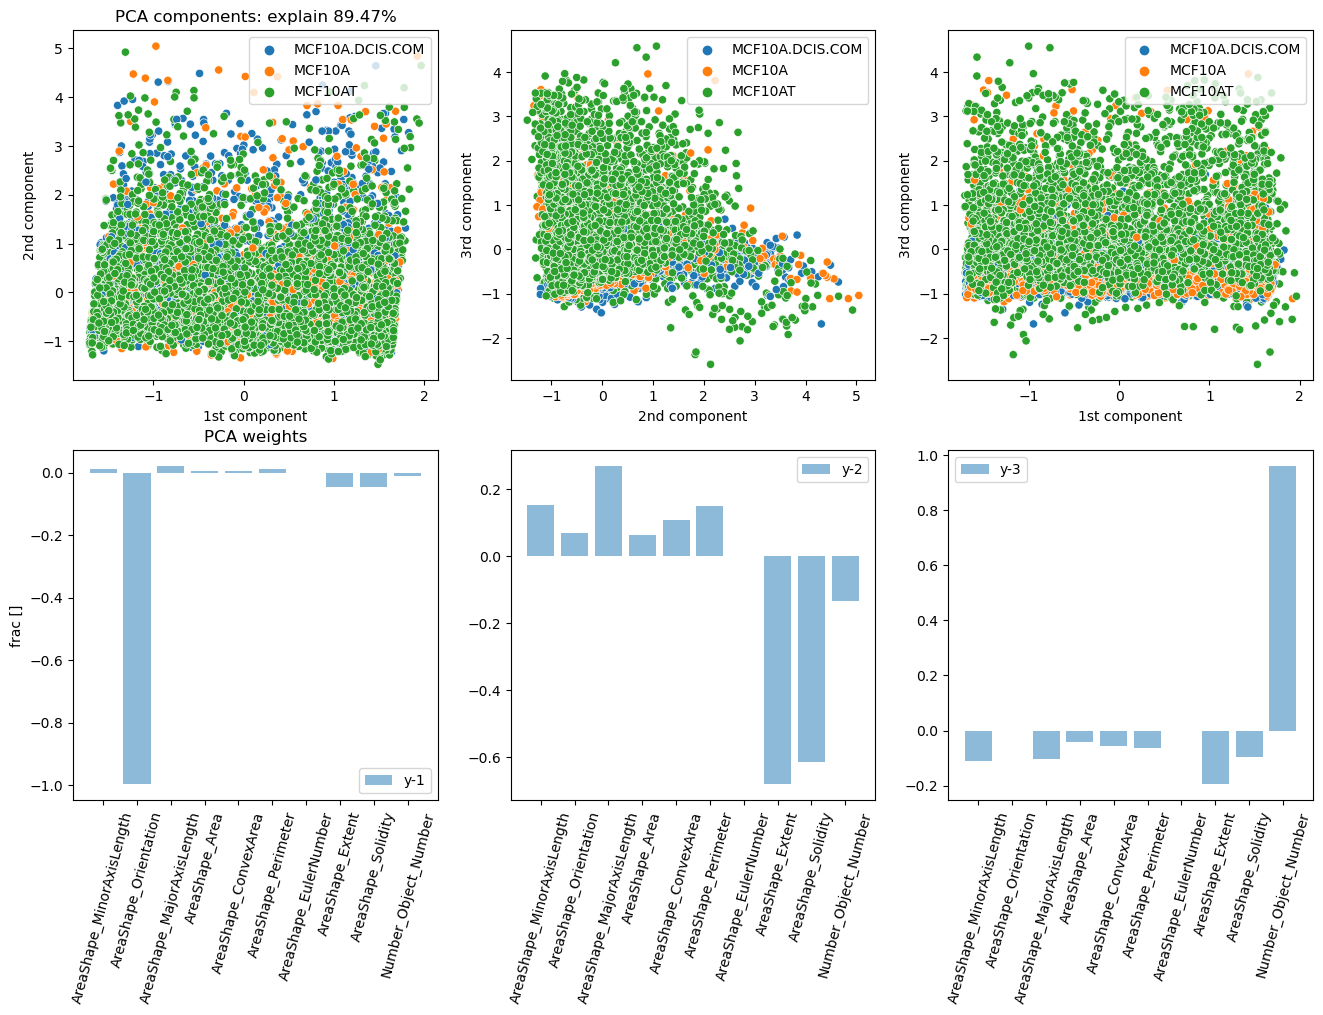

In [45]:
fig, ax = plt.subplots(2, 3,figsize=(16, 10),facecolor='white')


name = ax[0,0].set_title("PCA components: explain {:.2f}%".format(total_var))
ax[0,0].set_xlabel("1st component")
ax[0,0].set_ylabel("2nd component")
sns.scatterplot(x='1', y='2', data=comp, ax = ax[0,0], hue = "label")
ax[0,0].legend(loc='upper right')

ax[0,1].set_xlabel("2nd component")
ax[0,1].set_ylabel("3rd component")
sns.scatterplot(x='2', y='3', data=comp, ax = ax[0,1],  hue = "label")
ax[0,1].legend(loc='upper right')

ax[0,2].set_xlabel("1st component")
ax[0,2].set_ylabel("3rd component")
sns.scatterplot(x='1', y='3', data=comp, ax = ax[0,2],  hue = "label")
ax[0,2].legend(loc='upper right')

weights = pca.components_

ax[1,0].set_title("PCA weights")
ax[1,0].bar(list_columns,weights[0,:], label = "y-1", alpha = 0.5)
#ax[1,0].bar(np.arange(0,len(weights[0,1::2])),weights[0,1::2], label = "y-1", alpha = 0.5)
ax[1,0].legend()

ax[1,1].bar(list_columns,weights[1,:], label = "y-2", alpha = 0.5)
#ax[1,1].bar(np.arange(0,len(weights[0,1::2])),weights[1,1::2], label = "y-2", alpha = 0.5)
ax[1,1].legend()

ax[1,2].bar(list_columns,weights[2,:], label = "y-3", alpha = 0.5)
#ax[1,2].bar(np.arange(0,len(weights[0,1::2])),weights[2,1::2], label = "y-3", alpha = 0.5)
ax[1,2].legend()

ax[1,0].set_ylabel("frac []")

ax[1,0].set_xticklabels(list_columns, rotation=75)
ax[1,1].set_xticklabels(list_columns, rotation=75)
ax[1,2].set_xticklabels(list_columns, rotation=75)


In [ ]:
data_dict = {"path":[], "area": [], "perimeter": [] ,"label":[],"day":[],
             "conc":[],"cnt":[], "pixelSize": [], "time":[], 
             "run_num":[], "condition": [], "area_um": [], "mag":[]} 

run_num = 0
th = 500

for i in range(len(masks)):
    path = masks[i]
    path = os.path.normpath(path)
    parts = path.split(os.sep)
    try:
        name = parts[-1][:-8]
        time = parts[-2]
        if len(time) > 4:
            time = time[:-5]
        else:
            time = time[:-1]
        conc = parts[-3]
        label = parts[-4]
        day = parts[-5].split("_")[0]
        mag = int(parts[-1].split("_")[0][:-1])
        if mag == 2:
            m = 3.45/(20)
            mag = 20
        else:
            m = 3.45/(int(parts[-1].split("_")[0][:-1]))
        
    except:
        print("incorrect naming:", path)

    seg = np.load(path,allow_pickle=True).item()
    cnt, _ = cv2.findContours(seg["outlines"].astype("uint8"), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

    for k in range(len(cnt)):

        area = cv2.contourArea(cnt[k])
        contReal = cv2.arcLength(cnt[k],True)

        contour = np.array(cnt[k][:,0,:])
        
        if contour.shape[0] <= 2:
        #if area < 1500:
            print("skipping", contour.shape, i, k)
            continue

        data_dict["path"].append(i)
        data_dict["perimeter"].append(contReal)
        data_dict["label"].append(label)
        data_dict["day"].append(day)
        data_dict["cnt"].append(cnt[k])
        data_dict["pixelSize"].append(m)
        data_dict["time"].append(int(time))
        data_dict["run_num"].append(run_num)
        data_dict["conc"].append(conc)
        data_dict["area"].append(area)
        data_dict["area_um"].append(area*m**2)
        data_dict["mag"].append(mag)
        run_num += run_num

In [3]:
masks = glob("D:/instru_projects/TimeSeriesAnalysis/*/*/*/*/*.npy")
len(masks)

0

In [42]:
data_dict = {"path":[], "area": [], "perimeter": [] ,"label":[],"day":[],
             "conc":[],"cnt":[], "pixelSize": [], "time":[], 
             "run_num":[], "condition": [], "area_um": [], "mag":[]} 

run_num = 0
th = 500
for i in range(len(masks)):
    path = masks[i]
    path = os.path.normpath(path)
    parts = path.split(os.sep)
    try:
        name = parts[-1][:-8]
        time = parts[-2]
        if len(time) > 4:
            time = time[:-5]
        else:
            time = time[:-1]
        conc = parts[-3]
        label = parts[-4]
        day = parts[-5].split("_")[0]
        mag = int(parts[-1].split("_")[0][:-1])
        if mag == 2:
            m = 3.45/(20)
            mag = 20
        else:
            m = 3.45/(int(parts[-1].split("_")[0][:-1]))
        
    except:
        print("incorrect naming:", path)

    seg = np.load(path,allow_pickle=True).item()
    cnt, _ = cv2.findContours(seg["outlines"].astype("uint8"), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

    for k in range(len(cnt)):

        area = cv2.contourArea(cnt[k])
        contReal = cv2.arcLength(cnt[k],True)

        contour = np.array(cnt[k][:,0,:])
        if contour.shape[0] <= 2:
        #if area < 1500:
            print("skipping", contour.shape, i, k)
            continue

        data_dict["path"].append(i)
        data_dict["perimeter"].append(contReal)
        data_dict["label"].append(label)
        data_dict["day"].append(day)
        data_dict["cnt"].append(cnt[k])
        data_dict["pixelSize"].append(m)
        data_dict["time"].append(int(time))
        data_dict["run_num"].append(run_num)
        data_dict["conc"].append(conc)
        data_dict["area"].append(area)
        data_dict["area_um"].append(area*m**2)
        data_dict["mag"].append(mag)
        run_num += run_num

skipping (1, 2) 937 48
skipping (1, 2) 950 3
skipping (2, 2) 950 5
skipping (2, 2) 950 6
skipping (2, 2) 950 8
skipping (2, 2) 950 9


under size: 5020


(-276.0, 276.0)

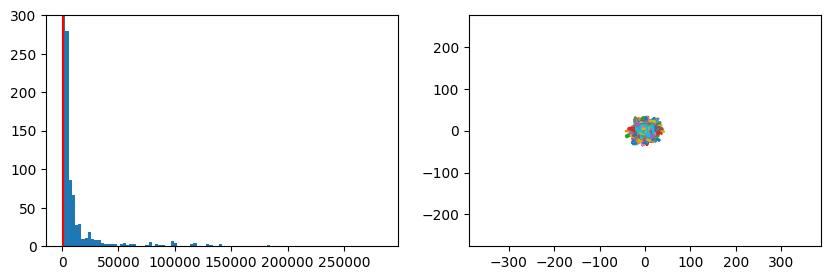

In [169]:
fig, ax = plt.subplots(1,2, figsize = (10,3))

th = 400
condition = np.array(data_dict["area_um"])>th
_ = ax[0].hist(data_dict["area_um"], bins = 100)
ax[0].vlines(th, 0, 1e3, color = "red")
#ax[0].vlines(300, 0, 1e3, color = "black")
ax[0].set_ylim(0,0.3e3)
moi = 0
for cnt, cond, m in zip(data_dict["cnt"], condition, data_dict["pixelSize"]):
    if not cond:

        moi += 1
        ax[1].plot((cnt[:,0,:][:,0]-cnt[:,0,:][:,0].mean())*m, (cnt[:,0,:][:,1]-cnt[:,0,:][:,1].mean())*m)

print("under size:",moi)
ax[1].set_xlim([-int(2250/2*0.345),int(2250/2*0.345)])
ax[1].set_ylim([-int(1600/2*0.345),int(1600/2*0.345)])

In [170]:
lines = ["day", "label", "conc", "run_num", "time", "area_um"]
df = pd.DataFrame()
df_cells = pd.DataFrame()
df_all = pd.DataFrame()
for i in lines:
    df[i] = np.array(data_dict[i])[condition]
    df_cells[i] = np.array(data_dict[i])[condition==False]
    df_all[i] = np.array(data_dict[i])


In [171]:
print("spheroid:", df.shape, "\nCell:", df_cells.shape)

spheroid: (2371, 6) 
Cell: (5020, 6)


In [172]:
temp_dict = { "label":[], "conc":[], "time":[], "ratio":[] }

for count,i in enumerate(df_all.groupby(["label", "conc"])):
    tags = i[0]
    current = i[1]
    for j in current.groupby(["time"]):
        time = j[0][0]
        frame = j[1]
        area = frame["area_um"]
        ratio = np.sum(area<th)/len(area)
        
        temp_dict["label"].append(tags[0])
        temp_dict["conc"].append(tags[1])
        temp_dict["time"].append(int(time))
        temp_dict["ratio"].append(ratio)

df_ratio = pd.DataFrame.from_dict(temp_dict)

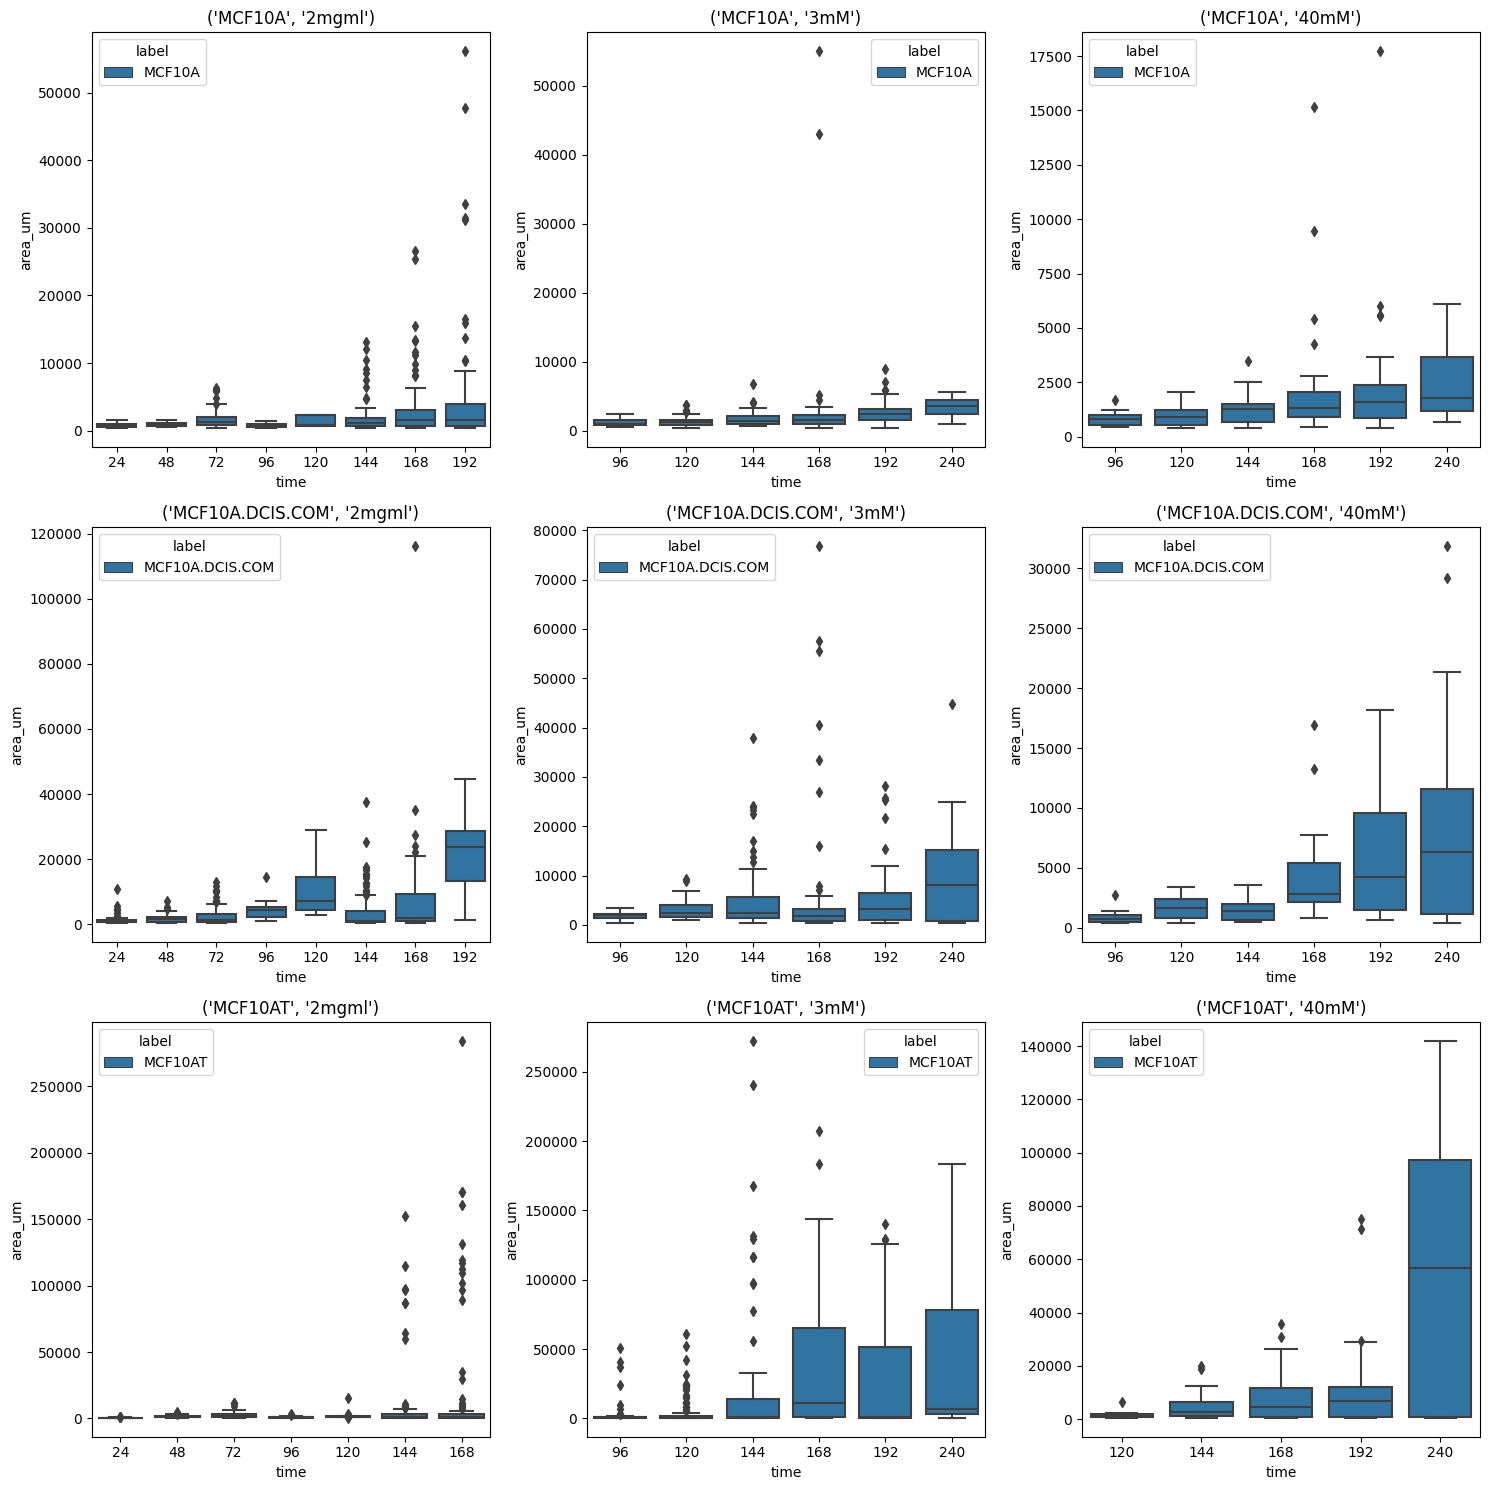

In [173]:
fig,ax = plt.subplots(3,3,figsize=(15,15), facecolor='white')

column = 0
row = 0

for count,i in enumerate(df.groupby(["label", "conc"])):
    ax[row,column].set_title(i[0])
    sns.boxplot(x= "time", y = "area_um", data = i[1], hue ="label", ax = ax[row, column])
    #ax[0,0].set_ylim([0,0.8e6])
    column += 1
    if column == 3:
        row += 1
        column = 0

fig.tight_layout()
#fig.savefig("./data/summary_combined.png")


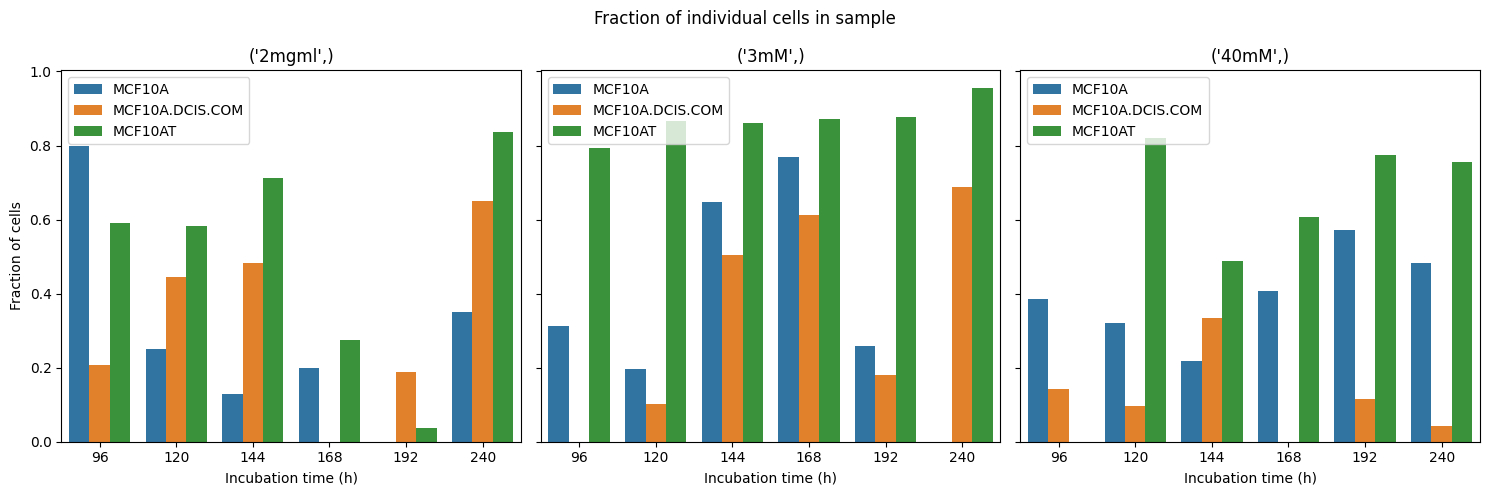

In [174]:
fig,ax = plt.subplots(1,3,figsize=(15,5), facecolor='white', sharex=True, sharey=True)
column = 0
row = 0
fig.suptitle("Fraction of individual cells in sample")
for count,i in enumerate(df_ratio.groupby(["conc"])):
    ax[column].set_title(i[0])
    sns.barplot(x= "time", y = "ratio", data = i[1], hue ="label", ax = ax[column])
    #ax[0,0].set_ylim([0,0.8e6])
    column += 1
    if column == 3:
        row += 1
        column = 0

ax[0].set_xlabel("Incubation time (h)")
ax[1].set_xlabel("Incubation time (h)")
ax[2].set_xlabel("Incubation time (h)")

ax[0].set_ylabel("Fraction of cells")

ax[1].set_ylabel("")
ax[2].set_ylabel("")

ax[0].legend(loc = "upper left")
ax[1].legend(loc = "upper left")
ax[2].legend(loc = "upper left")

fig.tight_layout()
#fig.savefig("./data/summary_combined.png")


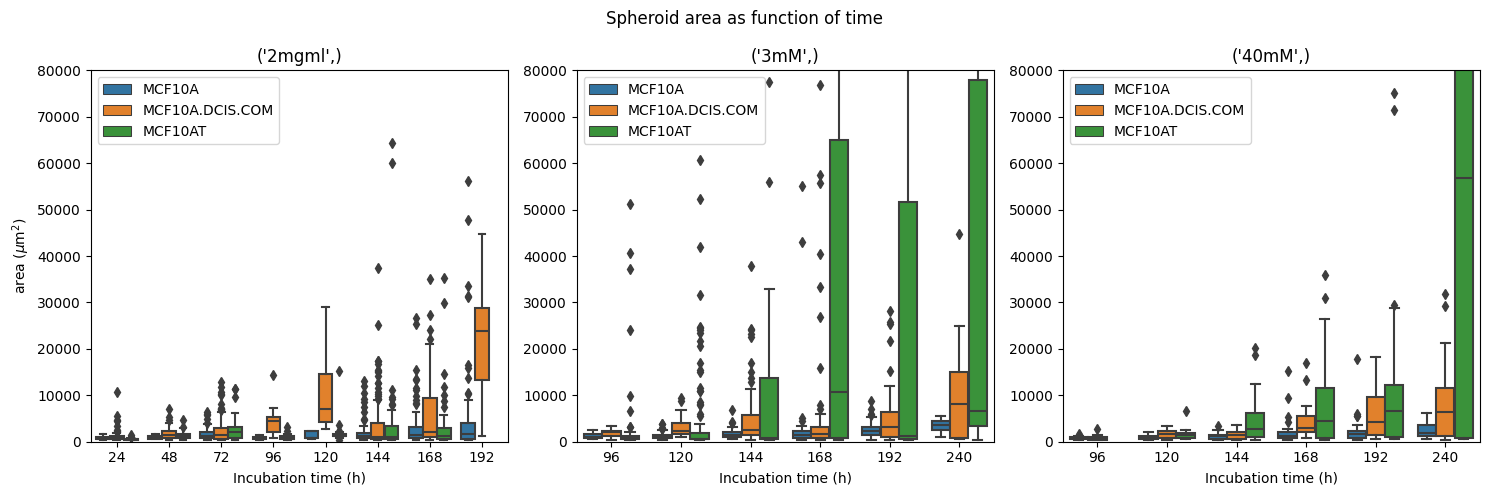

In [175]:
fig,ax = plt.subplots(1,3,figsize=(15,5), facecolor='white')

column = 0
row = 0

fig.suptitle("Spheroid area as function of time")

for count,i in enumerate(df.groupby(["conc"])):
    ax[column].set_title(i[0])
    sns.boxplot(x= "time", y = "area_um", data = i[1], hue ="label", ax = ax[column])
    #ax[0,0].set_ylim([0,0.8e6])
    column += 1
    if column == 3:
        row += 1
        column = 0

ax[0].set_xlabel("Incubation time (h)")
ax[1].set_xlabel("Incubation time (h)")
ax[2].set_xlabel("Incubation time (h)")

ax[0].set_ylabel(r"area ($\mu$m$^2$)")

ax[1].set_ylabel("")
ax[2].set_ylabel("")

ax[0].legend(loc = "upper left")
ax[1].legend(loc = "upper left")
ax[2].legend(loc = "upper left")

ax[0].set_ylim([0,80000])
ax[1].set_ylim([0,80000])
ax[2].set_ylim([0,80000])

fig.tight_layout()
#fig.savefig("./data/summary_combined.png")


In [176]:
from cmdstanpy import CmdStanModel
import arviz as az
from sklearn.preprocessing import RobustScaler

def norm(data):
    trans = RobustScaler()
    return trans.fit_transform(data.reshape(-1, 1))[:,0]

11:43:02 - cmdstanpy - INFO - compiling stan file C:\Users\lehtona6\codes\InstruProject\incubationSeries\stan\curveFit.stan to exe file C:\Users\lehtona6\codes\InstruProject\incubationSeries\stan\curveFit.exe
11:43:22 - cmdstanpy - INFO - compiled model executable: C:\Users\lehtona6\codes\InstruProject\incubationSeries\stan\curveFit.exe
11:43:22 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
11:43:22 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe --filename-in-msg=curveFit.stan --o=C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.hpp C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan
Warning in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 47, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically u


11:49:01 - cmdstanpy - INFO - CmdStan done processing.
11:49:01 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter[1] is 0, but must be positive! (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 43, column 3 to column 35)
	Exception: assign array size: assigning variable y_hat (100) and right hand side (362) must match in size (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 52, column 3 to column 57)
	Exception: assign array size: assigning variable y_hat (100) and right hand side (362) must match in size (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 52, column 3 to column 57)
	Exception: assign array size: assigning variable y_hat (100) and right hand side (362) must match in size (in 'C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan', line 52, column 3 to column 57)
	Exception: assign array size: ass

11:49:02 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1000 iterations at max treedepth (100.0%)
	Chain 2 had 1000 iterations at max treedepth (100.0%)
	Chain 3 had 1000 iterations at max treedepth (100.0%)
	Chain 4 had 8 divergent transitions (0.8%)
	Chain 4 had 992 iterations at max treedepth (99.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


ValueError: Axis limits cannot be NaN or Inf

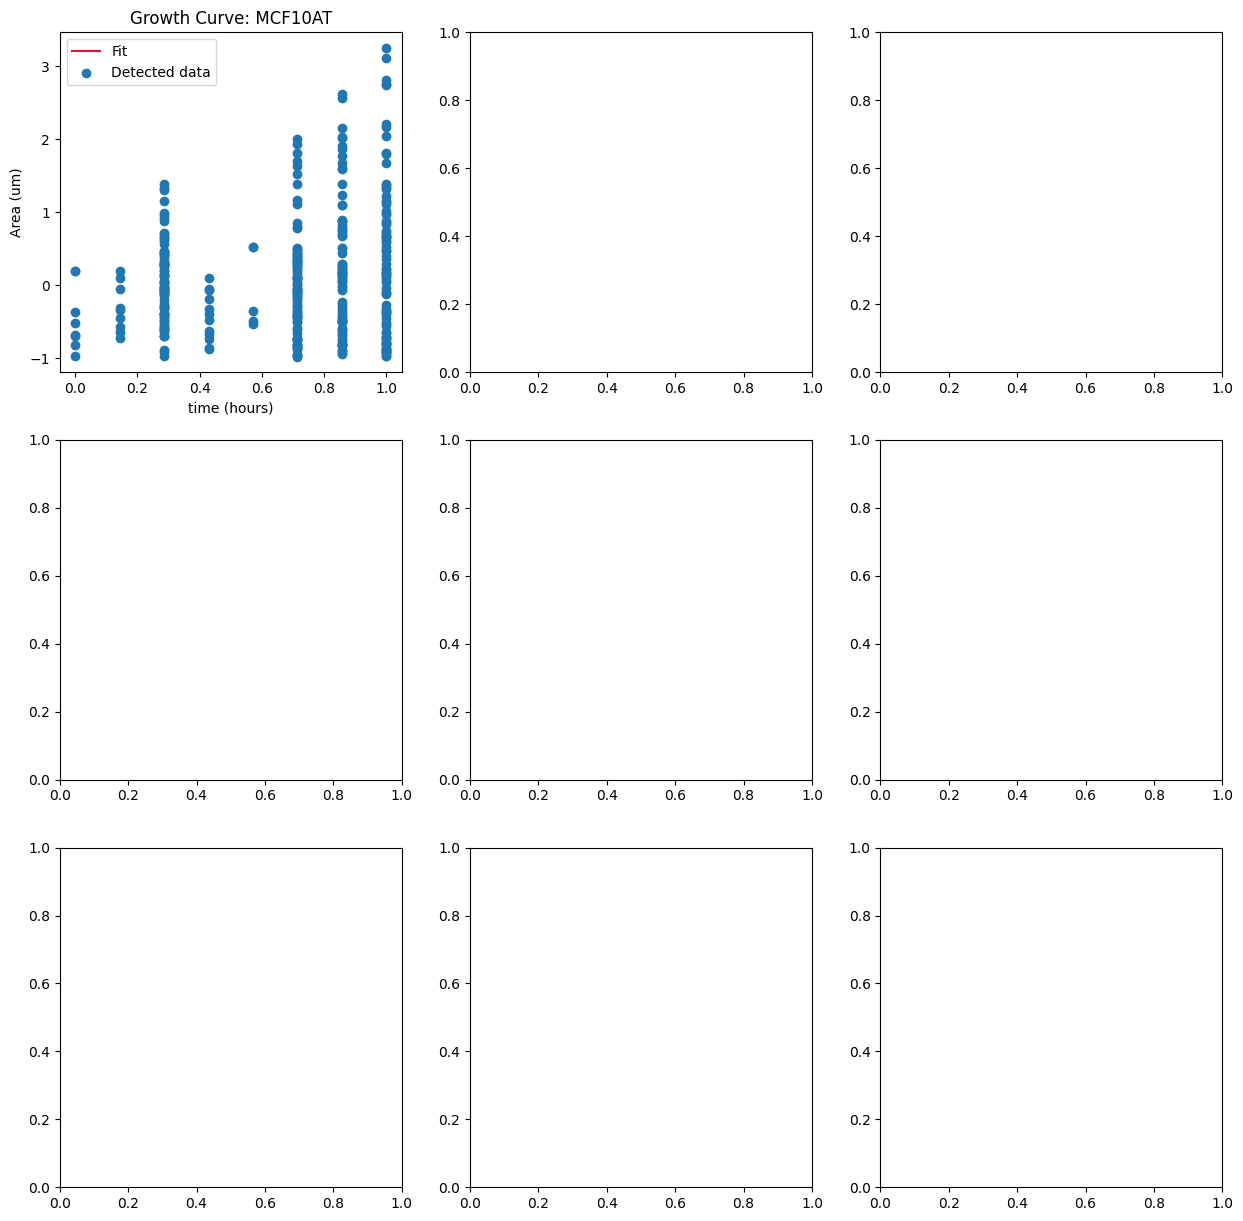

In [72]:
fig,ax = plt.subplots(3,3,figsize=(15,15), facecolor='white')

column = 0
row = 0

#fig.savefig("./data/summary_combined.png")

for count, i in enumerate(df.groupby(["conc", "label"])):
    tags = i[0]
    frame = i[1]

    area = norm(np.log(frame["area_um"].values))
    time = NormalizeData((frame["time"].values))

    x_hat = np.arange(time.min(), time.max(), 1e-2)

    stan_dict = {"N": frame.shape[0], 
        "area": area.tolist(), 
        "time": time.tolist(),
        "N_hat": len(x_hat),
        "x_hat": x_hat.tolist()}

    with open(os.path.join('./data_{}_{}.json'.format(tags[0],tags[1])),'w') as f:
        json.dump(stan_dict,f)

    #model = CmdStanModel(stan_file = "C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFitHetero.stan")
    model = CmdStanModel(stan_file = "C:/Users/lehtona6/codes/InstruProject/incubationSeries/stan/curveFit.stan")
    fit = model.sample(data = './data_{}_{}.json'.format(tags[0],tags[1]),adapt_delta =0.99)#, show_console= True)

    a = fit.draws_pd()

    y_hat = {}
    
    a = fit.draws_pd()
    noise = np.zeros((stan_dict["N_hat"], 4000))
    for j in range(1,stan_dict["N_hat"]+1):
        name = "y_hat[{}]".format(j)
        noise[j-1, :] = a[name]

    xx = np.array(stan_dict["x_hat"])

    me = np.percentile(noise,50,axis=1)
    low = np.percentile(noise,5,axis=1)
    up = np.percentile(noise,95,axis=1)

    ax[row,column].fill_between(xx,low,up,color='crimson',alpha=0.3)
    ax[row,column].plot(xx,me,color='crimson', label='Fit')
    ax[row,column].scatter(time, area, label = "Detected data")

    ax[row,column].legend()
    
    ax[row,column].set_title("Growth Curve: {}".format(label))
    ax[row,column].set_xlabel("time (hours)")
    ax[row,column].set_ylabel("Area (um)")
    ax[row,column].set_ylim([low.min()*1.1,up.max()*1.1])

    ax[row,column].set_title(tags)
    #sns.boxplot(x= "time", y = "area_um", data = i[1], hue ="label", ax = ax[row, column])
    #ax[0,0].set_ylim([0,0.8e6])
    column += 1
    if column == 3:
        row += 1
        column = 0

fig.tight_layout()
plt.show()


In [5]:
def normalize_efd(coeffs, size_invariant=True, return_transformation=False):
    """Normalizes an array of Fourier coefficients.

    See [#a]_ and [#b]_ for details.

    :param numpy.ndarray coeffs: A ``[n x 4]`` Fourier coefficient array.
    :param bool size_invariant: If size invariance normalizing should be done as well.
        Default is ``True``.
    :param bool return_transformation: If the normalization parametres should be returned.
        Default is ``False``.
    :return: The normalized ``[n x 4]`` Fourier coefficient array and optionally the
        transformation parametres ``scale``, :np:`psi_1` (rotation) and :np:`theta_1` (phase)
    :rtype: :py:class:`numpy.ndarray` or (:py:class:`numpy.ndarray`, (float, float, float))

    """
    # Make the coefficients have a zero phase shift from
    # the first major axis. Theta_1 is that shift angle.
    theta_1 = 0.5 * np.arctan2(
        2 * ((coeffs[0, 0] * coeffs[0, 1]) + (coeffs[0, 2] * coeffs[0, 3])),
        (
            (coeffs[0, 0] ** 2)
            - (coeffs[0, 1] ** 2)
            + (coeffs[0, 2] ** 2)
            - (coeffs[0, 3] ** 2)
        ),
    )
    # Rotate all coefficients by theta_1.
    for n in range(1, coeffs.shape[0] + 1):
        coeffs[n - 1, :] = np.dot(
            np.array(
                [
                    [coeffs[n - 1, 0], coeffs[n - 1, 1]],
                    [coeffs[n - 1, 2], coeffs[n - 1, 3]],
                ]
            ),
            np.array(
                [
                    [np.cos(n * theta_1), -np.sin(n * theta_1)],
                    [np.sin(n * theta_1), np.cos(n * theta_1)],
                ]
            ),
        ).flatten()

    # Make the coefficients rotation invariant by rotating so that
    # the semi-major axis is parallel to the x-axis.
    psi_1 = np.arctan2(coeffs[0, 2], coeffs[0, 0])
    psi_rotation_matrix = np.array(
        [[np.cos(psi_1), np.sin(psi_1)], [-np.sin(psi_1), np.cos(psi_1)]]
    )
    # Rotate all coefficients by -psi_1.
    for n in range(1, coeffs.shape[0] + 1):
        coeffs[n - 1, :] = psi_rotation_matrix.dot(
            np.array(
                [
                    [coeffs[n - 1, 0], coeffs[n - 1, 1]],
                    [coeffs[n - 1, 2], coeffs[n - 1, 3]],
                ]
            )
        ).flatten()

    size = coeffs[0, 0]
    if size_invariant:
        # Obtain size-invariance by normalizing.
        coeffs /= np.abs(size)

    if return_transformation:
        return coeffs, (size, psi_1, theta_1)
    else:
        return coeffs

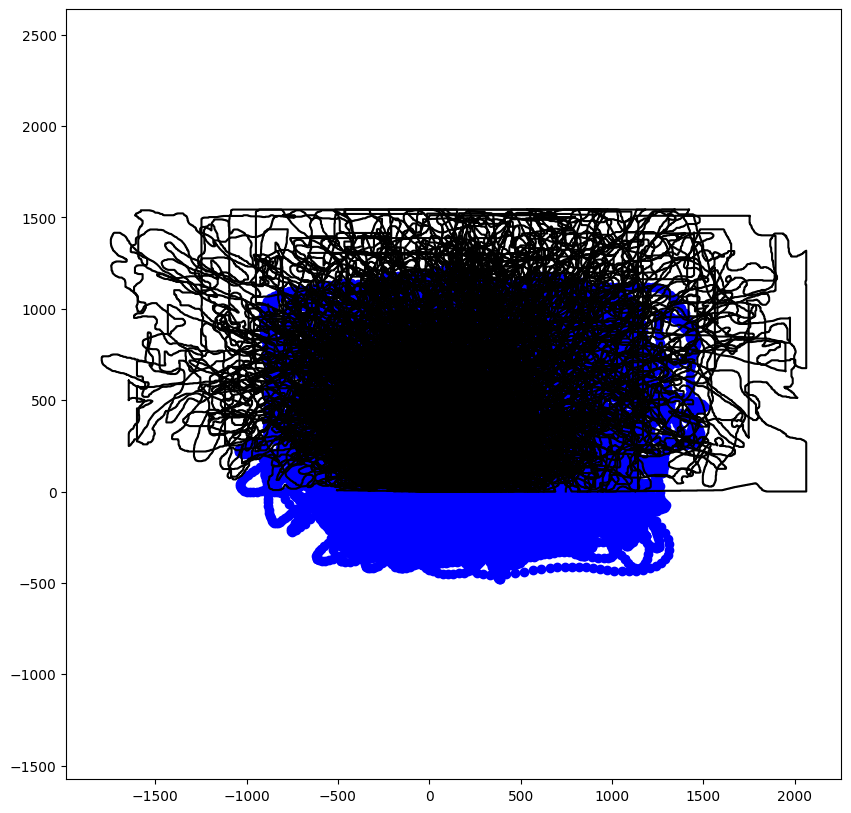

'\nfor i in range(len(data_dict["coeffs"])):\n    for j in range(order):\n        if exp_flag:\n            tempDict[r_x_list[j]].append(np.sqrt(data_dict["coeffs"][i][j,0]**2+data_dict["coeffs"][i][j,1]**2))\n            tempDict[r_y_list[j]].append(np.sqrt(data_dict["coeffs"][i][j,2]**2+data_dict["coeffs"][i][j,3]**2))\n        else:\n            tempDict[a_list[j]].append(data_dict["coeffs"][i][j,0])\n            tempDict[b_list[j]].append(data_dict["coeffs"][i][j,1])\n            tempDict[c_list[j]].append(data_dict["coeffs"][i][j,2])\n            tempDict[d_list[j]].append(data_dict["coeffs"][i][j,3])\n            \ndf_pca = pd.DataFrame.from_dict(tempDict)\ndf_pca = df_pca.replace(np.nan, 0)\n\npca = PCA(n_components=3,whiten = True)\npca = pca.fit(df_pca)\ncomponents = pca.fit_transform(df_pca)\ncomp = pd.DataFrame(components, columns = [\'1\',\'2\',\'3\'])\n'

In [43]:
##
order = 15
n_iter = 300
locus=(0.0, 0.0)
normalize = True
modesL = []

data_dict["coeffs"] = []
tempDict = {}

exp_flag = True

if exp_flag:
    r_x_list = np.array(list(map(lambda x: "r_x_" + x, np.arange(order).astype("str"))))
    r_y_list = np.array(list(map(lambda x: "r_y_" + x, np.arange(order).astype("str"))))
    for i in range(order):  
        tempDict[r_x_list[i]] = []
        tempDict[r_y_list[i]] = []
else:
    a_list = np.array(list(map(lambda x: "a_" + x, np.arange(order).astype("str"))))
    b_list = np.array(list(map(lambda x: "b_" + x, np.arange(order).astype("str"))))
    c_list = np.array(list(map(lambda x: "c_" + x, np.arange(order).astype("str"))))
    d_list = np.array(list(map(lambda x: "d_" + x, np.arange(order).astype("str"))))
    for i in range(order):  
        tempDict[a_list[i]] = []
        tempDict[b_list[i]] = []
        tempDict[c_list[i]] = []
        tempDict[d_list[i]] = []


fig, ax = plt.subplots(1,1, figsize = (10,10))
for k in range(len(data_dict["cnt"])):
    #coords
    contour = np.array(data_dict["cnt"][k][:,0,:])
    
    #if contour.shape[0] <= 2:
    #    data_dict["coeffs"].append(np.zeros((order,4)))
    #    continue
        
    #M = cv2.moments(contour)
    #cX = int(M["m10"] / M["m00"])
    #cY = int(M["m01"] / M["m00"])
    
    dxy = np.diff(contour, axis = 0 )
    

    #time
    dt = np.sqrt((dxy ** 2).sum(axis=1))
    t = np.concatenate([([0.0]), np.cumsum(dt)])
    T = t[-1]

    phi = 2*np.pi*t/T

    orders = np.arange(1, order + 1)
    consts = T / (2 * orders * orders * np.pi * np.pi)
    
    phi = phi * orders.reshape((order, -1))

    d_cos_phi = np.cos(phi[:, 1:]) - np.cos(phi[:, :-1])
    d_sin_phi = np.sin(phi[:, 1:]) - np.sin(phi[:, :-1])

    a = consts * np.sum((dxy[:, 0] / dt) * d_cos_phi, axis=1)
    b = consts * np.sum((dxy[:, 0] / dt) * d_sin_phi, axis=1)
    c = consts * np.sum((dxy[:, 1] / dt) * d_cos_phi, axis=1)
    d = consts * np.sum((dxy[:, 1] / dt) * d_sin_phi, axis=1)

    coeffs = np.concatenate(
        [
            a.reshape((order, 1)),
            b.reshape((order, 1)),
            c.reshape((order, 1)),
            d.reshape((order, 1)),
        ],
        axis=1,
    )
    
    #coeffs = normalize_efd(coeffs)

    data_dict["coeffs"].append(coeffs)


    xi = np.cumsum(dxy[:, 0]) - (dxy[:, 0] / dt) * t[1:]
    A0 = (1 / T) * np.sum(((dxy[:, 0] / (2 * dt)) * np.diff(t ** 2)) + xi * dt)
    delta = np.cumsum(dxy[:, 1]) - (dxy[:, 1] / dt) * t[1:]
    C0 = (1 / T) * np.sum(((dxy[:, 1] / (2 * dt)) * np.diff(t ** 2)) + delta * dt)

    first_b = np.array((A0,0,C0,0)).reshape((1,4))
    final = np.concatenate((first_b,coeffs), axis = 0)
    xpts, ypts, tempsL = calcLOCOcoef(final, contour)
    modesL.append(tempsL)

    a0 =contour[0, 0] + A0
    c0 = contour[0, 1] + C0

    N_tot = coeffs.shape[0]
    N_half = int(np.ceil(N_tot / 2))
    n_rows = 2

    t = np.linspace(0, 1.0, n_iter)
    xt = np.ones((n_iter,)) * locus[0]
    yt = np.ones((n_iter,)) * locus[1]
    
    for n in range(coeffs.shape[0]):
        xt += (coeffs[n, 0] * np.cos(2 * (n + 1) * np.pi * t)) + (
            coeffs[n, 1] * np.sin(2 * (n + 1) * np.pi * t)
        )
        yt += (coeffs[n, 2] * np.cos(2 * (n + 1) * np.pi * t)) + (
            coeffs[n, 3] * np.sin(2 * (n + 1) * np.pi * t)
        )

        #ax = plt.subplot2grid((n_rows, N_half), (n // N_half, n % N_half))
        #ax.set_title(str(n + 1))
        if n == coeffs.shape[0]-1:
            #ax.plot(contour[:, 0]-cX, contour[:, 1]-cY, "c--", linewidth=2)
            ax.scatter(xt+np.abs(int(xt[0]/2)), yt+np.abs(int(yt[0]/2)), color = "blue")
            ax.axis("equal")
    
    #ax.plot( xpts, ypts, color = "red")
    ax.plot(contour[:,0]-contour[0,0],contour[:,1]-contour[0,1], color = "black")


plt.show()

"""
for i in range(len(data_dict["coeffs"])):
    for j in range(order):
        if exp_flag:
            tempDict[r_x_list[j]].append(np.sqrt(data_dict["coeffs"][i][j,0]**2+data_dict["coeffs"][i][j,1]**2))
            tempDict[r_y_list[j]].append(np.sqrt(data_dict["coeffs"][i][j,2]**2+data_dict["coeffs"][i][j,3]**2))
        else:
            tempDict[a_list[j]].append(data_dict["coeffs"][i][j,0])
            tempDict[b_list[j]].append(data_dict["coeffs"][i][j,1])
            tempDict[c_list[j]].append(data_dict["coeffs"][i][j,2])
            tempDict[d_list[j]].append(data_dict["coeffs"][i][j,3])
            
df_pca = pd.DataFrame.from_dict(tempDict)
df_pca = df_pca.replace(np.nan, 0)

pca = PCA(n_components=3,whiten = True)
pca = pca.fit(df_pca)
components = pca.fit_transform(df_pca)
comp = pd.DataFrame(components, columns = ['1','2','3'])
"""


Text(0.5, 0, 'Var [Idx]')

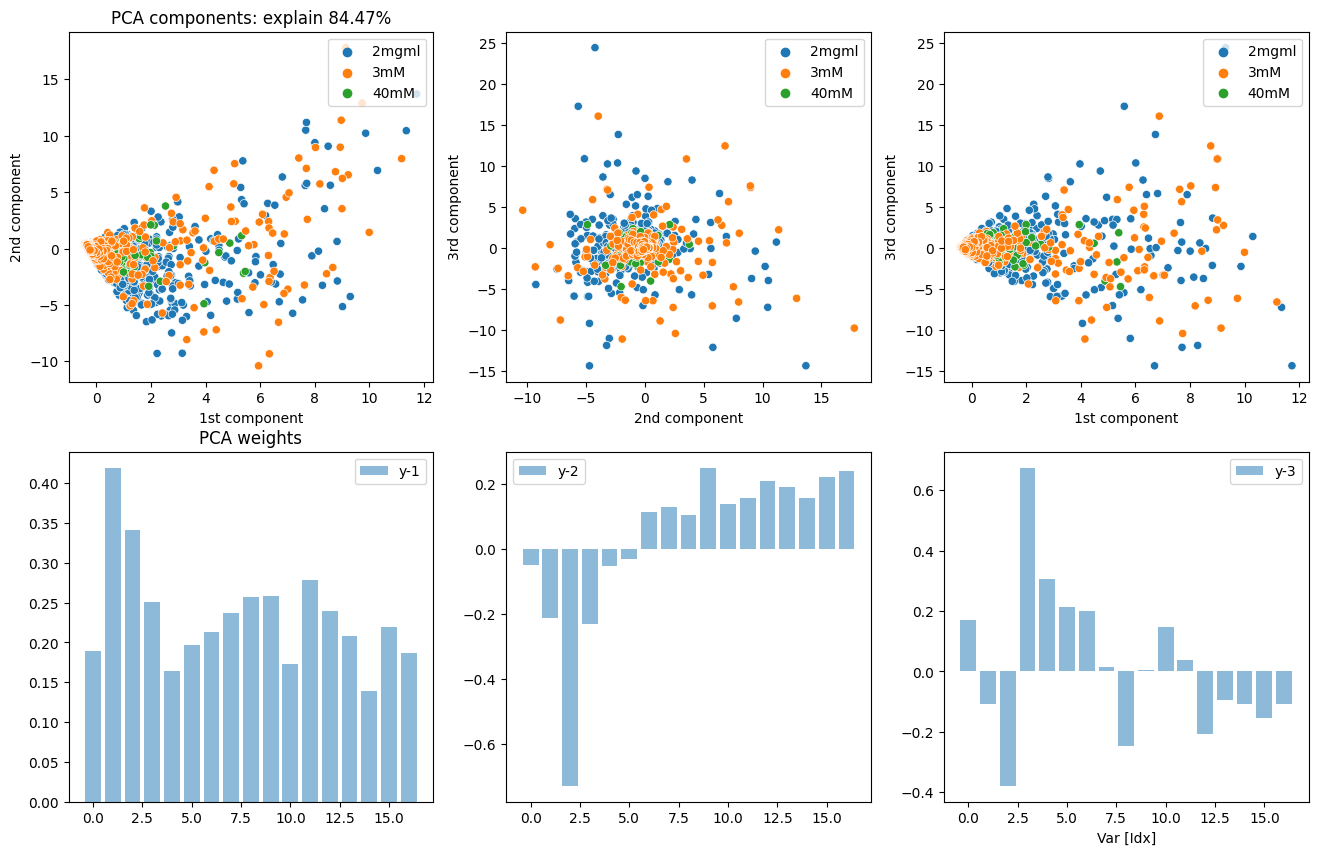

In [59]:
LOCO = np.array(modesL)

l_list = np.array(list(map(lambda x: "l_" + x, np.arange(1,order+3).astype("str"))))
df = pd.DataFrame(LOCO, columns=l_list)

#df["area"] = data_dict["area_um"]
#df["perimeter"] = data_dict["perimeter"]

df = df.replace(np.nan, 0)

#df = (df-df.mean())/df.std()
df = (df-df.min())/(df.max()-df.min())
#df = df.div(df.sum(axis=1), axis=0).fillna(0)

pca = PCA(n_components=3,whiten = True)
pca = pca.fit(df)
components = pca.fit_transform(df)
comp = pd.DataFrame(components, columns = ['1','2','3'])

fig, ax = plt.subplots(2, 3,figsize=(16, 10),facecolor='white')

comp = pd.DataFrame(components, columns = ['1','2','3'])
extra =['label', 'day', 'conc', 'run_num', 'pixelSize', 'time']

for i in extra:
    comp[i] = data_dict[i]
    
total_var = pca.explained_variance_ratio_.sum() * 100

ax[0,0].set_title("PCA components: explain {:.2f}%".format(total_var))
ax[0,0].set_xlabel("1st component")
ax[0,0].set_ylabel("2nd component")
sns.scatterplot(x='1', y='2', data=comp, ax = ax[0,0], hue = "conc")
ax[0,0].legend(loc='upper right')

ax[0,1].set_xlabel("2nd component")
ax[0,1].set_ylabel("3rd component")
sns.scatterplot(x='2', y='3', data=comp, ax = ax[0,1],  hue = "conc")
ax[0,1].legend(loc='upper right')

ax[0,2].set_xlabel("1st component")
ax[0,2].set_ylabel("3rd component")
sns.scatterplot(x='1', y='3', data=comp, ax = ax[0,2],  hue = "conc")
ax[0,2].legend(loc='upper right')

weights = pca.components_

ax[1,0].set_title("PCA weights")
ax[1,0].bar(np.arange(0,len(weights[0,:])),weights[0,:], label = "y-1", alpha = 0.5)
#ax[1,0].bar(np.arange(0,len(weights[0,1::2])),weights[0,1::2], label = "y-1", alpha = 0.5)
ax[1,0].legend()

ax[1,1].bar(np.arange(0,len(weights[0,:])),weights[1,:], label = "y-2", alpha = 0.5)
#ax[1,1].bar(np.arange(0,len(weights[0,1::2])),weights[1,1::2], label = "y-2", alpha = 0.5)
ax[1,1].legend()

ax[1,2].bar(np.arange(0,len(weights[0,:])),weights[2,:], label = "y-3", alpha = 0.5)
#ax[1,2].bar(np.arange(0,len(weights[0,1::2])),weights[2,1::2], label = "y-3", alpha = 0.5)
ax[1,2].legend()

ax[1,2].set_xlabel("Var [Idx]")
ax[1,2].set_xlabel("Var [Idx]")
ax[1,2].set_xlabel("Var [Idx]")

In [202]:
final[:,0]

array([-2.29480767e+01,  1.85545034e+01,  2.75314071e+00,  2.49063508e+00,
        6.54269002e-01,  6.23629342e-01, -1.11353746e-01, -4.14858577e-01,
       -3.11211942e-02, -4.85238845e-02,  3.56782337e-03,  3.53035104e-02,
       -4.58151584e-02, -1.53804917e-02, -7.37346178e-02, -6.10770485e-03])

In [236]:
xpts, ypts, locoL = calcLOCOcoef(final, contour)

In [6]:
def calcLOCOcoef(coeffs, contour):

    Nmode = 15

    alphastar = np.zeros((Nmode+1))
    betastar = np.zeros((Nmode+1))
    gamastar = np.zeros((Nmode+1))
    deltastar = np.zeros((Nmode+1))

    lambda1 = np.zeros((Nmode+1))
    lambda12 = np.zeros((Nmode+1))
    lambda21 = np.zeros((Nmode+1))
    lambda2 = np.zeros((Nmode+1))

    lambdaplus = np.zeros((Nmode+2))
    lambdaminus = np.zeros((Nmode+2))
    zetaplus = np.zeros((Nmode+2))
    zetaminus = np.zeros((Nmode+2))

    loclambplus = np.zeros((Nmode+2))
    loczetaplus = np.zeros((Nmode+2))
    loclambminus = np.zeros((Nmode+2))
    loczetaminus = np.zeros((Nmode+2))

    locoL = np.zeros(Nmode+2)
    #Eq 38., Lambda*zeta	
    mloc = 0
    posMax = 0

    aplus = np.zeros(Nmode+2)
    bplus = np.zeros(Nmode+2)
    cplus = np.zeros(Nmode+2)
    dplus = np.zeros(Nmode+2)
    aminus = np.zeros(Nmode+2)
    bminus = np.zeros(Nmode+2)
    cminus = np.zeros(Nmode+2)
    dminus = np.zeros(Nmode+2)

    tau1 = 1/2 * np.arctan2( 2*(coeffs[1,0]*coeffs[1,1] + coeffs[1,2]*coeffs[1,3]), coeffs[1,0]**2 + coeffs[1,2]**2 - coeffs[1,1]**2 - coeffs[1,3]**2)

    # eq 15, get alphaprime1, tauprime1
    alphap1 = coeffs[1,0]*np.cos(tau1) + coeffs[1,1]*np.sin(tau1)
    gamap1 = coeffs[1,2]*np.cos(tau1) + coeffs[1,3]*np.sin(tau1)

    # eq 16, get rho
    rho = np.arctan2( gamap1, alphap1 )

    # eq 17 symetry if needed
    if ( rho < 0 ):
        tau1 += np.pi

    alphastar[1:] = coeffs[1:,0] * np.cos(np.arange(1,Nmode+1)*tau1) + coeffs[1:,1]*np.sin(np.arange(1,Nmode+1)*tau1)
    betastar[1:] = -coeffs[1:,0] * np.sin(np.arange(1,Nmode+1)*tau1) + coeffs[1:,1]*np.cos(np.arange(1,Nmode+1)*tau1)
    gamastar[1:] = coeffs[1:,2] * np.cos(np.arange(1,Nmode+1)*tau1) + coeffs[1:,3]*np.sin(np.arange(1,Nmode+1)*tau1)
    deltastar[1:] = -coeffs[1:,2] * np.sin(np.arange(1,Nmode+1)*tau1) + coeffs[1:,3]*np.cos(np.arange(1,Nmode+1)*tau1)

    #inversion if needed (eq 9 et eq 19 )
    r1 = alphastar[1]*deltastar[1] - betastar[1]*gamastar[1]

    if ( r1 < 0 ):
        betastar[1:] = -betastar[1:]
        deltastar[1:] = -deltastar[1:]

    #eq25
    phi = 1/2*np.arctan2( 2*(alphastar[1:]*betastar[1:] + gamastar[1:]*deltastar[1:]), alphastar[1:]**2 + gamastar[1:]**2 - betastar[1:]**2 - deltastar[1:]**2)

    #eq 27, a',b',c',d'
    aprime = alphastar[1:]*np.cos(phi) + betastar[1:]*np.sin(phi)
    bprime = -alphastar[1:]*np.sin(phi) + betastar[1:]*np.cos(phi)
    cprime = gamastar[1:]*np.cos(phi) + deltastar[1:]*np.sin(phi)
    dprime = -gamastar[1:]*np.sin(phi) + deltastar[1:]*np.cos(phi)

    theta = np.arctan2( cprime, aprime)

    #eqaution 25, lambdas
    lambda1[1:] = np.cos(theta)*aprime + np.sin(theta)*cprime
    lambda12[1:] = np.cos(theta)*bprime + np.sin(theta)*dprime
    lambda21[1:] = -np.sin(theta)*aprime + np.cos(theta)*cprime
    lambda2[1:] = -np.sin(theta)*bprime + np.cos(theta)*dprime

    #eq 32
    lambdaplus[:-1] = (lambda1+lambda2) /2.0
    lambdaminus[:-1] = (lambda1-lambda2) / 2.0
    #eq 37
    zetaplus[1:-1] = theta-phi
    zetaminus[1:-1] = -theta-phi

    loclambplus[0] = lambdaplus[2]
    loclambminus[0] = 0
    loczetaplus[0] = zetaplus[2]
    loczetaminus[0] = 0
    #Below eq. 41: A+(l=1)
    loclambplus[1] = lambdaplus[1]
    loclambminus[1] = 0
    loczetaplus[1] = zetaplus[1]
    loczetaminus[1] = 0

    #Below eq. 41: A+(l>1)
    loclambplus[2:] = lambdaplus[2:]
    loczetaplus[2:] = zetaplus[2:]

    if (Nmode >= 2 ):
        loclambplus[Nmode] = 0
        loczetaplus[Nmode] = 0

    loclambplus[Nmode+1] = 0
    loczetaplus[Nmode+1] = 0

    #Below eq. 41: A-(l>0)
    loclambminus[2:] = lambdaminus[1:-1]
    loczetaminus[2:] = zetaminus[1:-1]

    aplus = loclambplus*np.cos(loczetaplus)
    bplus = -loclambplus*np.sin(loczetaplus)
    cplus = loclambplus*np.sin(loczetaplus)
    dplus = loclambplus*np.cos(loczetaplus)
    aminus = loclambminus*np.cos(loczetaminus)
    bminus = -loclambminus*np.sin(loczetaminus)
    cminus = -loclambminus*np.sin(loczetaminus)
    dminus = -loclambminus*np.cos(loczetaminus)

    #Equation 47: L
    locoL = np.sqrt(loclambplus*loclambplus + loclambminus*loclambminus + 2.0*loclambplus*loclambminus*np.cos(loczetaplus-loczetaminus-2.0*loczetaplus) )

    mloc = np.max(locoL[2:])
    posMax = np.argmax(locoL[2:])+3

    sumL = np.sum(locoL)
    e = 0

    fl = locoL/sumL
    e -= np.nansum(fl*np.log(fl))

    npts = contour[:,0].shape[0]

    Npts = npts*10
    xpts = np.zeros((Npts))
    ypts = np.zeros((Npts))

    dstep = T/Npts
    tcur = dstep

    #equation 42 of reconstruction
    for i in range(Npts):
        x = coeffs[0,0] # offset, A0
        y = coeffs[0,0]  # offset

        x += aplus[0]*np.cos(2*np.pi*2*tcur/T) + bplus[0]*np.sin(2*np.pi*2*tcur/T)
        y += cplus[0]*np.cos(2*np.pi*2*tcur/T) + dplus[0]*np.sin(2*np.pi*2*tcur/T)
        
        x += aplus[1]*np.cos(2*np.pi*1*tcur/T) + bplus[1]*np.sin(2*np.pi*1*tcur/T)
        y += cplus[1]*np.cos(2*np.pi*1*tcur/T) + dplus[1]*np.sin(2*np.pi*1*tcur/T)

        if ( Nmode >=2 ):
            for j in range(2,Nmode-1):        
                x += aplus[j]*np.cos(2*np.pi*(j+1)*tcur/T) + bplus[j]*np.sin(2*np.pi*(j+1)*tcur/T)
                y += cplus[j]*np.cos(2*np.pi*(j+1)*tcur/T) + dplus[j]*np.sin(2*np.pi*(j+1)*tcur/T)
            for j in range(2,Nmode+1):
                x += aminus[j]*np.cos(2*np.pi*(j-1)*tcur/T) + bminus[j]*np.sin(2*np.pi*(j-1)*tcur/T)
                y += cminus[j]*np.cos(2*np.pi*(j-1)*tcur/T) + dminus[j]*np.sin(2*np.pi*(j-1)*tcur/T)
        
        tcur += dstep
        xpts[i] = x	
        ypts[i] = y	
    return xpts, ypts, locoL



In [234]:
Nmode = 15
for i in range(2,Nmode+1):
    print(i)


2
3
4
5
6
7
8
9
10
11
12
13
14
15


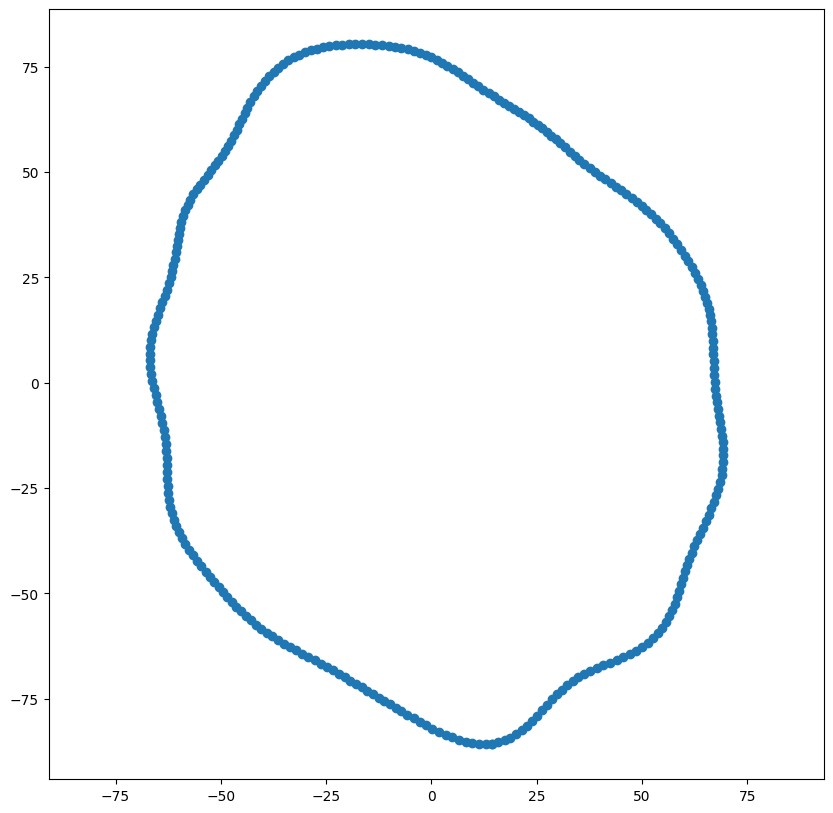

'"\nfor i in range(len(data_dict["coeffs"])):\n    for j in range(order):\n        if exp_flag:\n            tempDict[r_x_list[j]].append(np.sqrt(data_dict["coeffs"][i][j,0]**2+data_dict["coeffs"][i][j,1]**2))\n            tempDict[r_y_list[j]].append(np.sqrt(data_dict["coeffs"][i][j,2]**2+data_dict["coeffs"][i][j,3]**2))\n        else:\n            tempDict[a_list[j]].append(data_dict["coeffs"][i][j,0])\n            tempDict[b_list[j]].append(data_dict["coeffs"][i][j,1])\n            tempDict[c_list[j]].append(data_dict["coeffs"][i][j,2])\n            tempDict[d_list[j]].append(data_dict["coeffs"][i][j,3])\n            \ndf_pca = pd.DataFrame.from_dict(tempDict)\ndf_pca = df_pca.replace(np.nan, 0)\n\npca = PCA(n_components=3,whiten = True)\npca = pca.fit(df_pca)\ncomponents = pca.fit_transform(df_pca)\ncomp = pd.DataFrame(components, columns = [\'1\',\'2\',\'3\'])\n'

In [161]:
##
order = 15
n_iter = 300
locus=(0.0, 0.0)
normalize = True

data_dict["coeffs"] = []
tempDict = {}

exp_flag = True

if exp_flag:
    r_x_list = np.array(list(map(lambda x: "r_x_" + x, np.arange(order).astype("str"))))
    r_y_list = np.array(list(map(lambda x: "r_y_" + x, np.arange(order).astype("str"))))
    for i in range(order):  
        tempDict[r_x_list[i]] = []
        tempDict[r_y_list[i]] = []
else:
    a_list = np.array(list(map(lambda x: "a_" + x, np.arange(order).astype("str"))))
    b_list = np.array(list(map(lambda x: "b_" + x, np.arange(order).astype("str"))))
    c_list = np.array(list(map(lambda x: "c_" + x, np.arange(order).astype("str"))))
    d_list = np.array(list(map(lambda x: "d_" + x, np.arange(order).astype("str"))))
    for i in range(order):  
        tempDict[a_list[i]] = []
        tempDict[b_list[i]] = []
        tempDict[c_list[i]] = []
        tempDict[d_list[i]] = []


fig, ax = plt.subplots(1,1, figsize = (10,10))
for k in range(len(data_dict["cnt"][:1])):
    #coords
    contour = np.array(data_dict["cnt"][k][:,0,:])
    
    if contour.shape[0] <= 2:
        data_dict["coeffs"].append(np.zeros((order,4)))
        continue
        
    #M = cv2.moments(contour)
    #cX = int(M["m10"] / M["m00"])
    #cY = int(M["m01"] / M["m00"])
    
    dxy = np.diff(contour, axis = 0 )
    

    #time
    dt = np.sqrt((dxy ** 2).sum(axis=1))
    t = np.concatenate([([0.0]), np.cumsum(dt)])
    T = t[-1]

    phi = 2*np.pi*t/T

    orders = np.arange(1, order + 1)
    consts = T / (2 * orders * orders * np.pi * np.pi)
    
    phi = phi * orders.reshape((order, -1))

    d_cos_phi = np.cos(phi[:, 1:]) - np.cos(phi[:, :-1])
    d_sin_phi = np.sin(phi[:, 1:]) - np.sin(phi[:, :-1])

    xi = np.cumsum(dxy[:, 0]) - (dxy[:, 0] / dt) * t[1:]
    A0 = (1 / T) * np.sum(((dxy[:, 0] / (2 * dt)) * np.diff(t ** 2)) + xi * dt)
    delta = np.cumsum(dxy[:, 1]) - (dxy[:, 1] / dt) * t[1:]
    C0 = (1 / T) * np.sum(((dxy[:, 1] / (2 * dt)) * np.diff(t ** 2)) + delta * dt)


    a = consts * np.sum((dxy[:, 0] / dt) * d_cos_phi, axis=1)
    b = consts * np.sum((dxy[:, 0] / dt) * d_sin_phi, axis=1)
    c = consts * np.sum((dxy[:, 1] / dt) * d_cos_phi, axis=1)
    d = consts * np.sum((dxy[:, 1] / dt) * d_sin_phi, axis=1)

    coeffs = np.concatenate(
        [
            a.reshape((order, 1)),
            b.reshape((order, 1)),
            c.reshape((order, 1)),
            d.reshape((order, 1)),
        ],
        axis=1,
    )
    
    
    #coeffs = normalize_efd(coeffs)
    
    data_dict["coeffs"].append(coeffs)
    a0 = contour[0, 0] + A0
    c0 = contour[0, 1] + C0

    N_tot = coeffs.shape[0]
    N_half = int(np.ceil(N_tot / 2))
    n_rows = 2

    t = np.linspace(0, 1.0, n_iter)
    xt = np.ones((n_iter,)) * locus[0]
    yt = np.ones((n_iter,)) * locus[1]
    
    for n in range(coeffs.shape[0]):
        xt += (coeffs[n, 0] * np.cos(2 * (n + 1) * np.pi * t)) + (
            coeffs[n, 1] * np.sin(2 * (n + 1) * np.pi * t)
        )
        yt += (coeffs[n, 2] * np.cos(2 * (n + 1) * np.pi * t)) + (
            coeffs[n, 3] * np.sin(2 * (n + 1) * np.pi * t)
        )

        #ax = plt.subplot2grid((n_rows, N_half), (n // N_half, n % N_half))
        #ax.set_title(str(n + 1))
        if n == coeffs.shape[0]-1:
            #ax.plot(contour[:, 0]-cX, contour[:, 1]-cY, "c--", linewidth=2)
            ax.scatter(xt, yt)
            ax.axis("equal")

plt.show()

""""
for i in range(len(data_dict["coeffs"])):
    for j in range(order):
        if exp_flag:
            tempDict[r_x_list[j]].append(np.sqrt(data_dict["coeffs"][i][j,0]**2+data_dict["coeffs"][i][j,1]**2))
            tempDict[r_y_list[j]].append(np.sqrt(data_dict["coeffs"][i][j,2]**2+data_dict["coeffs"][i][j,3]**2))
        else:
            tempDict[a_list[j]].append(data_dict["coeffs"][i][j,0])
            tempDict[b_list[j]].append(data_dict["coeffs"][i][j,1])
            tempDict[c_list[j]].append(data_dict["coeffs"][i][j,2])
            tempDict[d_list[j]].append(data_dict["coeffs"][i][j,3])
            
df_pca = pd.DataFrame.from_dict(tempDict)
df_pca = df_pca.replace(np.nan, 0)

pca = PCA(n_components=3,whiten = True)
pca = pca.fit(df_pca)
components = pca.fit_transform(df_pca)
comp = pd.DataFrame(components, columns = ['1','2','3'])
"""

Text(0.5, 0, 'Var [Idx]')

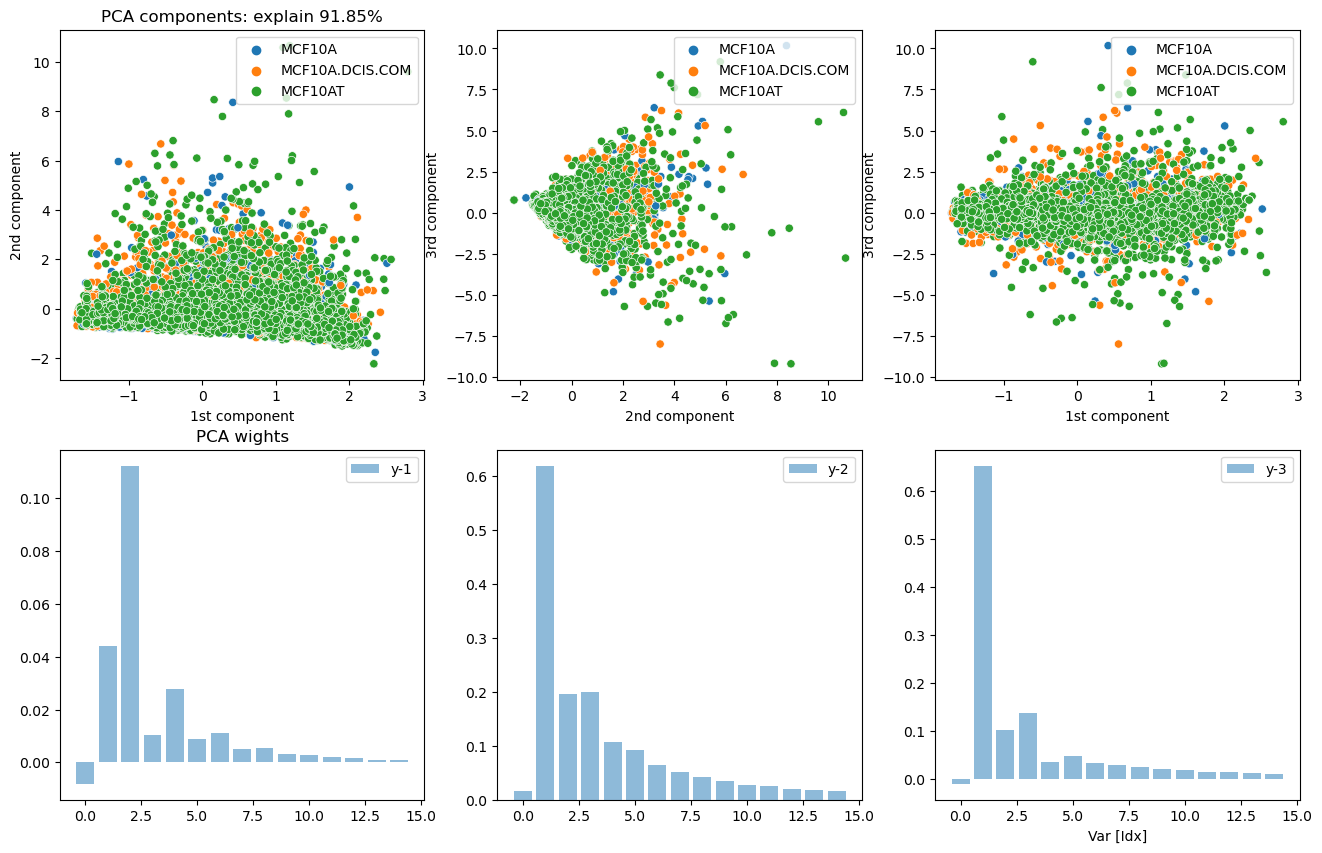

In [220]:
fig, ax = plt.subplots(2, 3,figsize=(16, 10),facecolor='white')

comp = pd.DataFrame(components, columns = ['1','2','3'])
extra =['label', 'day', 'conc', 'run_num', 'pixelSize', 'time']
for i in extra:
    comp[i] = data_dict[i]
    
total_var = pca.explained_variance_ratio_.sum() * 100

ax[0,0].set_title("PCA components: explain {:.2f}%".format(total_var))
ax[0,0].set_xlabel("1st component")
ax[0,0].set_ylabel("2nd component")
sns.scatterplot(x='1', y='2', data=comp, ax = ax[0,0], hue = "label")
ax[0,0].legend(loc='upper right')

ax[0,1].set_xlabel("2nd component")
ax[0,1].set_ylabel("3rd component")
sns.scatterplot(x='2', y='3', data=comp, ax = ax[0,1],  hue = "label")
ax[0,1].legend(loc='upper right')

ax[0,2].set_xlabel("1st component")
ax[0,2].set_ylabel("3rd component")
sns.scatterplot(x='1', y='3', data=comp, ax = ax[0,2],  hue = "label")
ax[0,2].legend(loc='upper right')

weights = pca.components_

ax[1,0].set_title("PCA weights")
ax[1,0].bar(np.arange(0,len(weights[0,::2])),weights[0,::2], label = "y-1", alpha = 0.5)
#ax[1,0].bar(np.arange(0,len(weights[0,1::2])),weights[0,1::2], label = "y-1", alpha = 0.5)
ax[1,0].legend()

ax[1,1].bar(np.arange(0,len(weights[0,::2])),weights[1,::2], label = "y-2", alpha = 0.5)
#ax[1,1].bar(np.arange(0,len(weights[0,1::2])),weights[1,1::2], label = "y-2", alpha = 0.5)
ax[1,1].legend()

ax[1,2].bar(np.arange(0,len(weights[0,::2])),weights[2,::2], label = "y-3", alpha = 0.5)
#ax[1,2].bar(np.arange(0,len(weights[0,1::2])),weights[2,1::2], label = "y-3", alpha = 0.5)
ax[1,2].legend()

ax[1,2].set_xlabel("Var [Idx]")
ax[1,2].set_xlabel("Var [Idx]")
ax[1,2].set_xlabel("Var [Idx]")

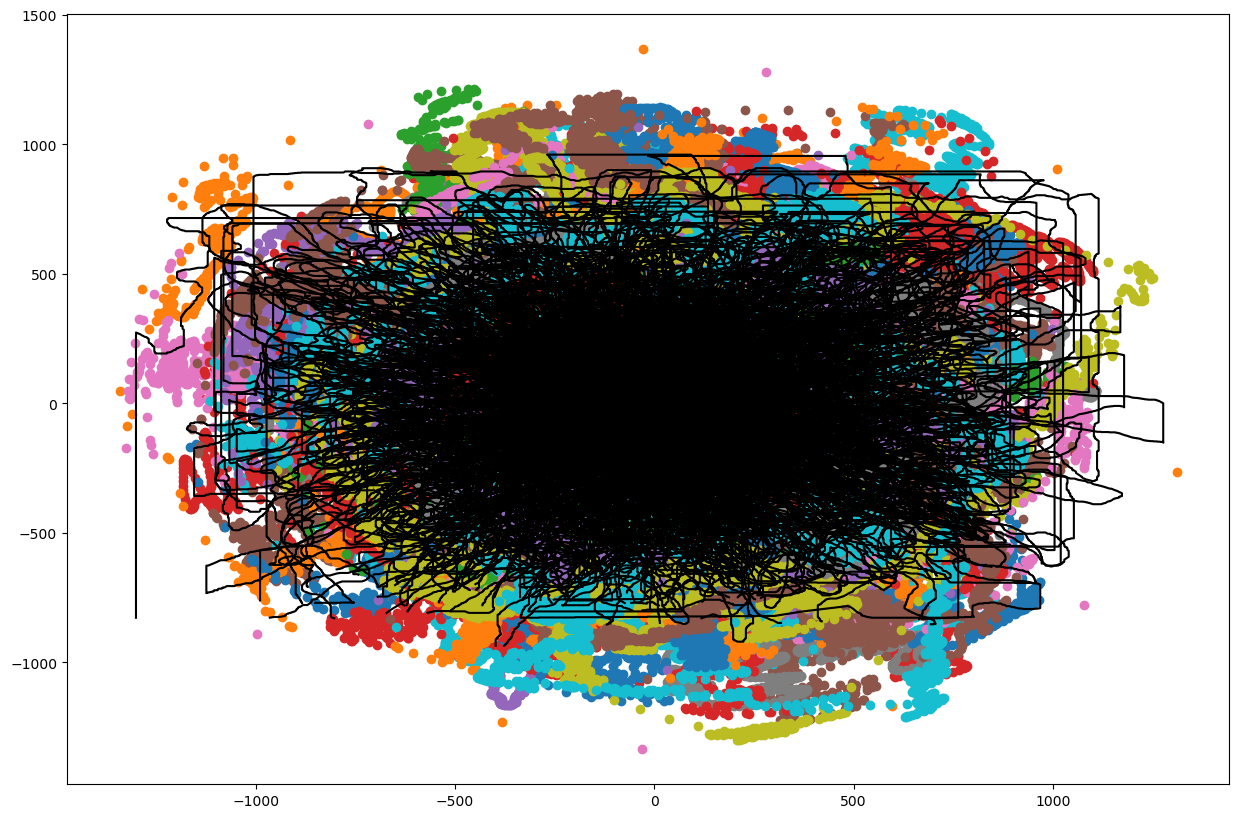

In [221]:
order = 20
pw_tot = []
tempDict = {}
data_dict["pw"] = []
data_dict["freqs"] = []
longest = 0

polar = True
gradient = False
fig, ax = plt.subplots(1, 1,figsize=(15, 10),facecolor='white')

for k in range(len(data_dict["cnt"])):
    #coords
    contour = np.array(data_dict["cnt"][k][:,0,:])
    xx = contour.astype(np.float32)
    
    if xx.shape[0] <= 2:
        data_dict["pw"].append(np.zeros((1,2)))
        continue
        
    if xx.shape[0]%2 != 0:
        xx = xx[:-1]
    xx = xx.astype(np.float32)-np.mean(xx,axis=0)[None,...]

    yy = xx.copy()
    if polar:
        #convert to polar
        r = np.sqrt(xx[:,0]**2 + xx[:,1]**2)


        phi = np.unwrap(np.arctan2(xx[:,1],xx[:,0]))#np.unwrap()
        if gradient:
            r = np.gradient(r)
            phi = np.gradient(phi)
        phi -= np.mean(phi)
        #phi = np.gradient(phi)
        yy[:,0] = r
        yy[:,1] = phi
    else:
        if gradient:
            yy = np.gradient(xx, axis = 0)

    #xx[:,0] = scipy.ndimage.gaussian_filter(r,5)
    #xx[:,1] = scipy.ndimage.gaussian_filter(phi,5)
    
    
    N = xx.shape[0]
    threshold = 400
    mirror = int(N/2)
    #N = 50
    
    #for count,threshold in enumerate(range(order)):
        
    fft_xy = np.fft.fft(yy, axis = 0)
    pw = np.abs(fft_xy)**2

    idx = np.argsort(pw,axis=0)[::-1]
    n = idx[:threshold]
    sub_sig = np.zeros((N,2),dtype=np.complex128)
    sub_sig[n] = fft_xy[n]

    i_sig = np.real(np.fft.ifft(sub_sig,axis=0) )
    
    pw = np.abs(sub_sig)**2/N # power densinty
    t = np.arange(N)
    freq = np.fft.fftfreq(t.shape[-1])

    #if count == 0:
    ax.plot(xx[:,0],xx[:,1],color = "black", label = "Contour")

    #ax.scatter(i_sig[:,0],i_sig[:,1], label = "Component {}".format(count))
    ax.scatter(np.cos(i_sig[:,1])*i_sig[:,0],np.sin(i_sig[:,1])*i_sig[:,0], label = "Component {}".format(count))
        
    pos_freq = np.where(freq>0)[0]
    neg_freq = np.where(freq<0)[0]



    
    pw_pos = pw[pos_freq,:]
    pw_neg = pw[np.flip(neg_freq)[:-1],:] #zero is not 
    pw = np.concatenate((pw[0,:].reshape(1,2),pw_pos)) #+pw_neg
    #pw[:,0] = NormalizeData(pw[:,0])
    #pw[:,1] = NormalizeData(pw[:,1])
    
    if pw.shape[0] < 25:
        #r_norm = NormalizeData(pw[:,0])
        #phi_norm  = NormalizeData(pw[:,1])
        r_norm = pw[:,0]
        phi_norm  = pw[:,1]
        data_dict["pw"].append(np.stack((r_norm,phi_norm), axis = -1))
    else:
        #r_norm = NormalizeData(pw[:order,0])
        #phi_norm = NormalizeData(pw[:order,1])
        r_norm = pw[:order,0]
        phi_norm  = pw[:order,1]
        data_dict["pw"].append(np.stack((r_norm,phi_norm), axis = -1))
        longest = data_dict["pw"][-1].shape[0]
        pos_freqs = freq[pos_freq]
        
    
#headerR = np.array(list(map(lambda x: "r_" + x,np.arange(longest).astype("str"))))
headerPhi = np.array(list(map(lambda x: "p_" + x, np.arange(longest).astype("str"))))

#for i in range(longest):
#    tempDict[headerR[i]] = []
for i in range(longest):  
    tempDict[headerPhi[i]] = []

for i in range(len(data_dict["pw"])):
    for j in range(longest):
        if data_dict["pw"][i].shape[0] <= j:
            #tempDict[headerR[j]].append(0)
            tempDict[headerPhi[j]].append(0)
        else:
            #tempDict[headerR[j]].append(data_dict["pw"][i][j,0])
            tempDict[headerPhi[j]].append(data_dict["pw"][i][j,1])

for i in tempDict.keys():
    tempDict[i] = NormalizeData(np.array(tempDict[i]))
    
df_pca = pd.DataFrame.from_dict(tempDict)
df_pca = df_pca.replace(np.nan, 0)

pca = PCA(n_components=3,whiten = True)
pca = pca.fit(df_pca)
components = pca.fit_transform(df_pca)
comp = pd.DataFrame(components, columns = ['1','2','3'])


Text(0.5, 0, 'Var [Idx]')

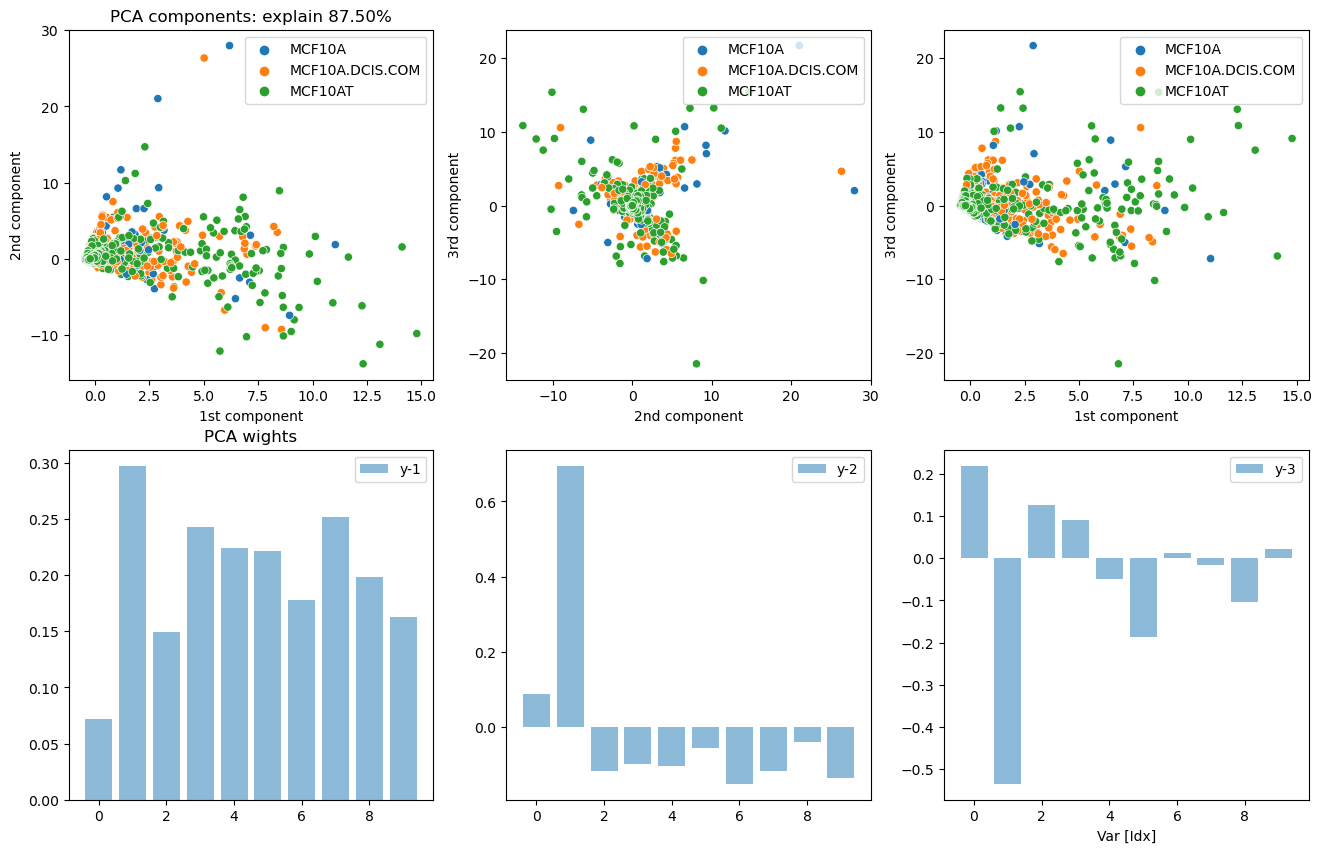

In [222]:
fig, ax = plt.subplots(2, 3,figsize=(16, 10),facecolor='white')

comp = pd.DataFrame(components, columns = ['1','2','3'])
extra =['label', 'day', 'conc', 'time','run_num', 'pixelSize']
for i in extra:
    comp[i] = data_dict[i]
    
total_var = pca.explained_variance_ratio_.sum() * 100

ax[0,0].set_title("PCA components: explain {:.2f}%".format(total_var))
ax[0,0].set_xlabel("1st component")
ax[0,0].set_ylabel("2nd component")
sns.scatterplot(x='1', y='2', data=comp, ax = ax[0,0], hue = "label")
ax[0,0].legend(loc='upper right')

ax[0,1].set_xlabel("2nd component")
ax[0,1].set_ylabel("3rd component")
sns.scatterplot(x='2', y='3', data=comp, ax = ax[0,1],  hue = "label")
ax[0,1].legend(loc='upper right')

ax[0,2].set_xlabel("1st component")
ax[0,2].set_ylabel("3rd component")
sns.scatterplot(x='1', y='3', data=comp, ax = ax[0,2],  hue = "label")
ax[0,2].legend(loc='upper right')

weights = pca.components_

ax[1,0].set_title("PCA wights")
ax[1,0].bar(np.arange(0,len(weights[0,::2])),weights[0,::2], label = "y-1", alpha = 0.5)
#ax[1,0].bar(np.arange(0,len(weights[0,1::2])),weights[0,1::2], label = "y-1", alpha = 0.5)
ax[1,0].legend()

ax[1,1].bar(np.arange(0,len(weights[0,::2])),weights[1,::2], label = "y-2", alpha = 0.5)
#ax[1,1].bar(np.arange(0,len(weights[0,1::2])),weights[1,1::2], label = "y-2", alpha = 0.5)
ax[1,1].legend()

ax[1,2].bar(np.arange(0,len(weights[0,::2])),weights[2,::2], label = "y-3", alpha = 0.5)
#ax[1,2].bar(np.arange(0,len(weights[0,1::2])),weights[2,1::2], label = "y-3", alpha = 0.5)
ax[1,2].legend()

ax[1,2].set_xlabel("Var [Idx]")
ax[1,2].set_xlabel("Var [Idx]")
ax[1,2].set_xlabel("Var [Idx]")

## 2D analysi

In [ ]:
##
order = 15 #between 10-20

data_dict["coeffs"] = []
tempDict = {}


for k in range(len(data_dict["cnt"][:1])):

    if contour.shape[0] <= 2:
        data_dict["coeffs"].append(np.zeros((order,4)))
        continue
        
    x = contour[:,0]
    y = contour[:,1]
    
    n = len(x)


    #coords
    contour = np.array(data_dict["cnt"][k][:,0,:])
    

 
    for i in range(n):
        creal = x*np.cos(2*np.pi*np.arange(0,n)*i/n) + y*np.sin(2*np.pi*np.arange(0,n)*i/n) 
        cimag = -x*np.cos(2*np.pi*np.arange(0,n)*i/n) + y*np.cos(2*np.pi*np.arange(0,n)*i/n) 

        oreal =np.cumsum(creal)
        oimag =np.cumsum(cimag)

        oAmpl = np.sqrt(oreal**2 + oimag**2)

    toreal = oreal[1:(order+1)]
    toimag =  oimag[1:(order+1)]
    toAmpl =  oAmpl[1:(order+1)]
    tnumber =  np.arange(1,(order+1))